In [31]:
import numpy as np
import pandas as pd 
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns


In [2]:
data = pd.read_csv('mnist.csv')


X = data.drop('class', axis=1) / 255
y = data['class']

X.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X.shape

(70000, 784)

In [4]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [6]:
model = MLPClassifier(hidden_layer_sizes=(50,) , max_iter=100 , alpha=1e-4,solver='sgd', random_state=1 
                      , learning_rate_init=.1 , verbose=10 , tol=1e-4)

In [7]:
model.fit(X_train,y_train)

Iteration 1, loss = 0.34807983
Iteration 2, loss = 0.16787041
Iteration 3, loss = 0.12334690
Iteration 4, loss = 0.09944321
Iteration 5, loss = 0.08314235
Iteration 6, loss = 0.07377693
Iteration 7, loss = 0.06340973
Iteration 8, loss = 0.05696898
Iteration 9, loss = 0.04918797
Iteration 10, loss = 0.04459017
Iteration 11, loss = 0.04034927
Iteration 12, loss = 0.03528042
Iteration 13, loss = 0.03235654
Iteration 14, loss = 0.02915535
Iteration 15, loss = 0.02617270
Iteration 16, loss = 0.02352415
Iteration 17, loss = 0.02141425
Iteration 18, loss = 0.01922427
Iteration 19, loss = 0.01661018
Iteration 20, loss = 0.01570911
Iteration 21, loss = 0.01395848
Iteration 22, loss = 0.01198040
Iteration 23, loss = 0.01025597
Iteration 24, loss = 0.00903401
Iteration 25, loss = 0.00811913
Iteration 26, loss = 0.00696308
Iteration 27, loss = 0.00568704
Iteration 28, loss = 0.00521888
Iteration 29, loss = 0.00531074
Iteration 30, loss = 0.00481745
Iteration 31, loss = 0.00360760
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100,
              random_state=1, solver='sgd', verbose=10)

In [8]:
model.score(X_train, y_train)

1.0

In [9]:
model.score(X_test, y_test)

0.9719523809523809

In [10]:
scores = cross_val_score(model, X_train, y_train, cv=5)

Iteration 1, loss = 0.37370915
Iteration 2, loss = 0.17853008
Iteration 3, loss = 0.13505803
Iteration 4, loss = 0.10912708
Iteration 5, loss = 0.09145924
Iteration 6, loss = 0.07656488
Iteration 7, loss = 0.06578890
Iteration 8, loss = 0.05846160
Iteration 9, loss = 0.05184307
Iteration 10, loss = 0.04451691
Iteration 11, loss = 0.04001824
Iteration 12, loss = 0.03530672
Iteration 13, loss = 0.03152258
Iteration 14, loss = 0.02826479
Iteration 15, loss = 0.02465945
Iteration 16, loss = 0.02285618
Iteration 17, loss = 0.02036127
Iteration 18, loss = 0.01685153
Iteration 19, loss = 0.01563372
Iteration 20, loss = 0.01302593
Iteration 21, loss = 0.01120728
Iteration 22, loss = 0.01041383
Iteration 23, loss = 0.00899731
Iteration 24, loss = 0.00753535
Iteration 25, loss = 0.00652658
Iteration 26, loss = 0.00593071
Iteration 27, loss = 0.00517033
Iteration 28, loss = 0.00458602
Iteration 29, loss = 0.00413093
Iteration 30, loss = 0.00390670
Iteration 31, loss = 0.00345765
Iteration 32, los

In [11]:
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.96959184 0.96928571 0.97387755 0.97040816 0.97112245]
Mean cross-validation score: 0.9708571428571429


In [12]:
y_pred = model.predict(X_test)

In [13]:
y_pred.shape

(21000,)

In [14]:
clf = classification_report(y_test,y_pred)

In [15]:
print(clf)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2058
           1       0.98      0.99      0.98      2364
           2       0.97      0.97      0.97      2133
           3       0.97      0.96      0.97      2176
           4       0.97      0.97      0.97      1936
           5       0.97      0.97      0.97      1915
           6       0.98      0.98      0.98      2088
           7       0.98      0.97      0.97      2248
           8       0.97      0.95      0.96      1992
           9       0.96      0.96      0.96      2090

    accuracy                           0.97     21000
   macro avg       0.97      0.97      0.97     21000
weighted avg       0.97      0.97      0.97     21000



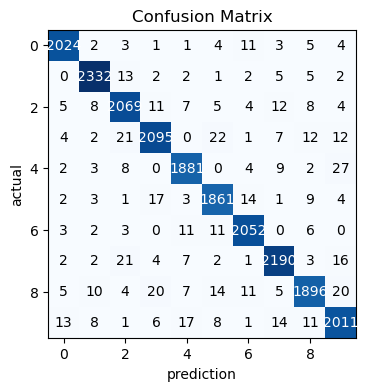

In [16]:
cm = confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(4,4))
plt.xlabel("prediction")
plt.ylabel("actual")
plt.title("Confusion Matrix")
plt.show()

Text(0.5, 14.722222222222216, 'Prediction')

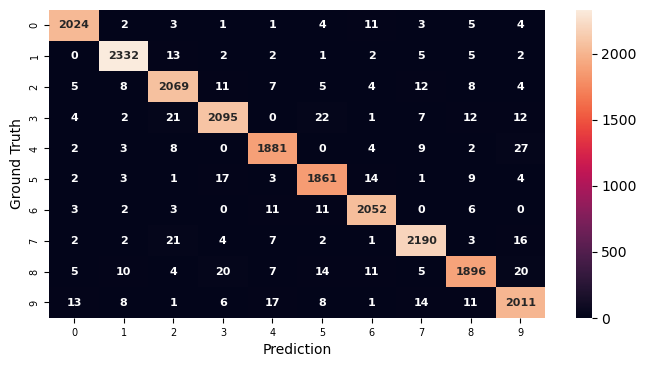

In [49]:
sns.set_palette(sns.color_palette()), ax == plt.subplots(figsize=(8,4))
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', annot_kws={"size": 8, "weight": "bold"})
labels = np.unique(y_test)
ax.set_xticklabels(labels, fontsize=7);
ax.set_yticklabels(labels, fontsize=7);
ax.set_ylabel('Ground Truth', fontsize=10);
ax.set_xlabel('Prediction', fontsize=10)

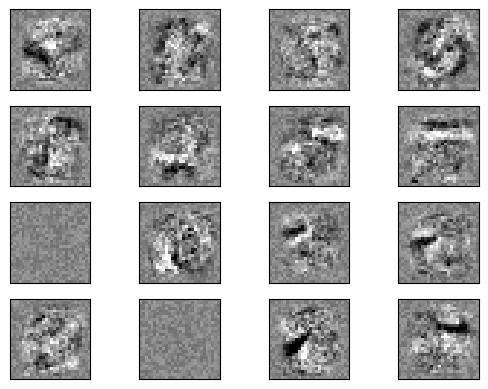

In [17]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin = model.coefs_[0].min()
vmax = model.coefs_[0].max()

for coef, ax in zip(model.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray , vmin=.5 * vmin , vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())